In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.0f' % x) # muestra sin notacion cientifica
arg_exp = 'C:\\Users\\Usuario\\Desktop\\Port Folio\\Pandas y Matplotlib\\Proyecto I+D UNO\\Graf. 22\\Argentina Bal.csv'
#C:\Users\Usuario\Desktop\Port Folio\Pandas y Matplotlib\Proyecto I+D UNO\Graf. 22

In [2]:
#df = pd.read_csv(arg_exp)
df_arg_exp = pd.read_csv(arg_exp, delimiter=';', decimal=',')
df_arg_exp.head()

,AÑOS,Balanza
0,2000,-263294939
1,2001,142281578
2,2002,785533330
3,2003,1807195014
4,2004,1329519026


In [3]:
df_arg_exp["Balanza"].dtype

dtype('float64')

In [4]:
# Convertir la columna Balanza a enteros de 64 bits
#df_arg_exp["Balanza"] = df_arg_exp["Balanza"].astype(np.int64)
df_arg_exp.loc[:, 'Balanza'] = df_arg_exp['Balanza'].apply(lambda x: int(x) if x == x else x)

In [5]:
print(df_arg_exp)

    AÑOS     Balanza
0   2000  -263294939
1   2001   142281578
2   2002   785533330
3   2003  1807195014
4   2004  1329519026
5   2005  1125336391
6   2006   564085610
7   2007   456324137
8   2008  -246454992
9   2009  -917514698
10  2010 -1332930066
11  2011 -3969569545
12  2012 -4343204290
13  2013 -5286222205
14  2014 -5839327309
15  2015 -6176961885
16  2016 -5593980868
17  2017 -7339232216
18  2018 -7271544826
19  2019 -2008089122
20  2020 -3001040803
21  2021 -6187347642
22  2022 -7926931344
23  2023 -8035072379


In [6]:
import pandas as pd

# Lista de archivos
archivos = ['C:\\Users\\Usuario\\Desktop\\Port Folio\\Pandas y Matplotlib\\Proyecto I+D UNO\\Graf. 22\\Brasil Bal.csv',
            'C:\\Users\\Usuario\\Desktop\\Port Folio\\Pandas y Matplotlib\\Proyecto I+D UNO\\Graf. 22\\Paraguay Bal.csv',
            'C:\\Users\\Usuario\\Desktop\\Port Folio\\Pandas y Matplotlib\\Proyecto I+D UNO\\Graf. 22\\Uruguay Bal.csv']

# Lista para almacenar Series de Exportaciones transformadas
series_transformadas = []

# Iterar sobre los archivos
for archivo in archivos:
    # Leer el archivo CSV y cargar los datos en un DataFrame
    df = pd.read_csv(archivo, delimiter=';', decimal=',')
    
    # Transformar la columna 'Exportaciones' a enteros
    exportaciones_transformadas = df['Balanza'].apply(lambda x: int(x) if x == x else x)
    
    # Agregar la Serie transformada a la lista
    series_transformadas.append(exportaciones_transformadas)

# Concatenar las Series en una sola DataFrame
df_final = pd.concat(series_transformadas, axis=1)

# Mostrar el DataFrame resultante
print(df_final)



        Balanza     Balanza    Balanza
0    -134347953  -213750522  -10915833
1     581104234  -208546007   -7640072
2     967549875  -172676472   36374753
3    2388134628  -215997493   16520338
4    1735169374  -337386664  -44828456
5    1489623924  -532898331  -98564041
6     422844269 -1199931079 -159767163
7   -1819596494 -1497908291 -332802110
8   -3515453241 -2252054043 -662432229
9    5090351859 -1919110050 -534210341
10   5156060314 -3221399960 -662694121
11  11518422847 -3408809137 -817672172
12   6981069705 -2937497409 -752021587
13   8697726035 -3159533859 -541636171
14   3262393732 -2833602054 -777541625
15   4441293567 -2225029866 -600592890
16  11783387722 -2470602070 -576883036
17  19934470558 -3422942522  -94900883
18  28772324991 -3536518159  -83494317
19  27329224901 -3987778230  384535937
20  33009632193 -2841615258   31810836
21  40256940837 -3684842154  865408311
22  28974311497 -4201743634  321780289
23  46825997812 -4566613874 -652343294


In [7]:
nuevos_nombres = ['Brasil_FOB', 'Paraguay_FOB', 'Uruguay_FOB']
df_final.columns = nuevos_nombres

In [8]:
df_final.head()

,Brasil_FOB,Paraguay_FOB,Uruguay_FOB
0,-134347953,-213750522,-10915833
1,581104234,-208546007,-7640072
2,967549875,-172676472,36374753
3,2388134628,-215997493,16520338
4,1735169374,-337386664,-44828456


In [9]:
# Asi filtramos desde la columna años los datos desde 2000 hasta el 2019
df_concatenado = pd.concat([df_arg_exp, df_final], axis=1)# acá unimos, concatenando el primer df con el segundo
df_concatenado_c = df_concatenado[(df_concatenado['AÑOS']>=2000) & (df_concatenado['AÑOS']<=2019)]
df_concatenado_c

,AÑOS,Balanza,Brasil_FOB,Paraguay_FOB,Uruguay_FOB
0,2000,-263294939,-134347953,-213750522,-10915833
1,2001,142281578,581104234,-208546007,-7640072
2,2002,785533330,967549875,-172676472,36374753
3,2003,1807195014,2388134628,-215997493,16520338
4,2004,1329519026,1735169374,-337386664,-44828456
5,2005,1125336391,1489623924,-532898331,-98564041
6,2006,564085610,422844269,-1199931079,-159767163
7,2007,456324137,-1819596494,-1497908291,-332802110
8,2008,-246454992,-3515453241,-2252054043,-662432229
9,2009,-917514698,5090351859,-1919110050,-534210341


In [10]:
#df_concatenado_c['Balanza'].dtype
#df_concatenado_c["Balanza"] = df_concatenado_c["Balanza"].astype(np.int64) # da error
df_concatenado_c.loc[:, "Balanza"] = df_concatenado_c["Balanza"].astype(np.int64)

In [11]:
df_concatenado_c["Balanza"].dtype

dtype('float64')

In [12]:
df_concatenado_c.to_csv('df_plot.csv')

In [13]:
df_concatenado_c.head()

,AÑOS,Balanza,Brasil_FOB,Paraguay_FOB,Uruguay_FOB
0,2000,-263294939,-134347953,-213750522,-10915833
1,2001,142281578,581104234,-208546007,-7640072
2,2002,785533330,967549875,-172676472,36374753
3,2003,1807195014,2388134628,-215997493,16520338
4,2004,1329519026,1735169374,-337386664,-44828456


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt


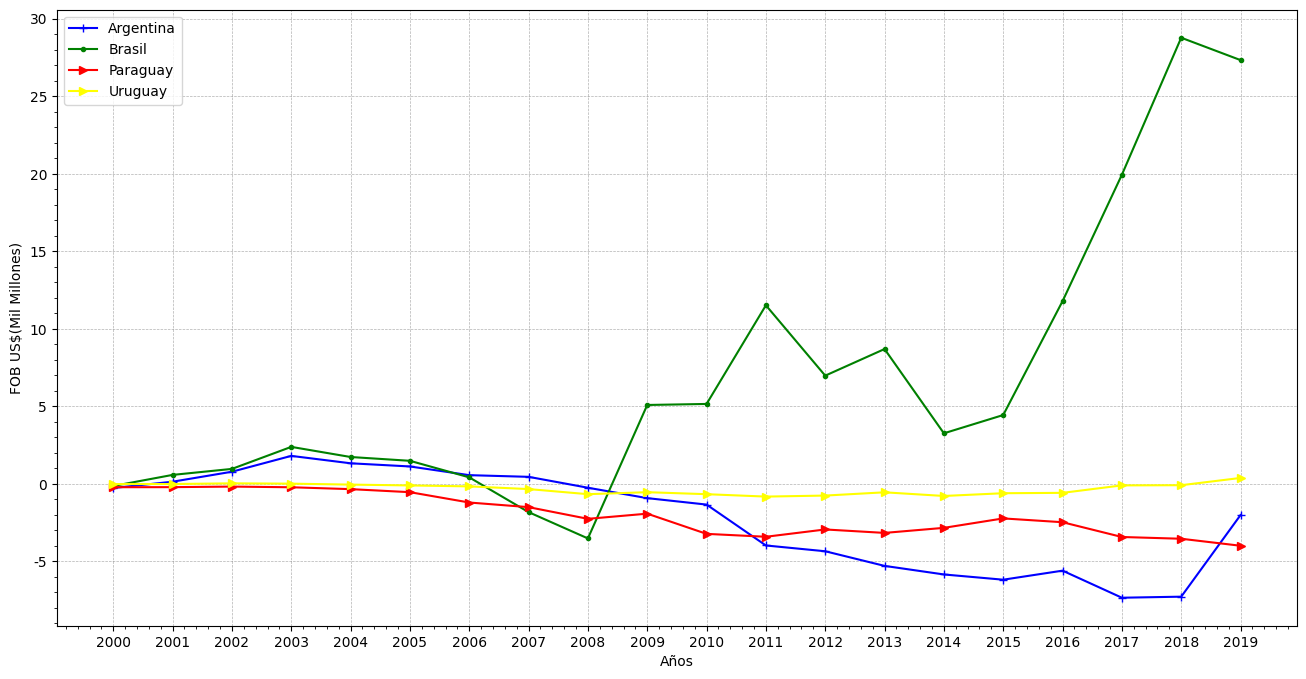

In [22]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter  # Importa FuncFormatter
plt.figure(figsize=(16, 8))
# Definir una función para formatear los valores del eje x (en este caso, para eliminar los puntos flotantes)
def format_years(x, pos):
    return int(x)

def format_y_plain(x, pos):
    return f'{x/1000000000:.0f}'  # Mostrar el número completo sin notación científica

# Crea el gráfico de barras
#plt.plot(df['Ano'], df['URY'], marker='*', label = "Uruguay",  linestyle='--')
#plt.plot(df['Ano'], df['BRA'], marker='+', label = "Brasil")

plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Balanza'], marker='+', label = "Argentina", color = "blue")
plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Brasil_FOB'], marker='.', label = "Brasil", color = "green")
plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Paraguay_FOB'], marker='>', label = "Paraguay", color = "red")
plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Uruguay_FOB'], marker='>', label = "Uruguay", color = "yellow")

#activar leyenda
plt.legend()

#etiquetas en los ejes
plt.xlabel("Años") #etiqueta en eje x
plt.ylabel("FOB US$(Mil Millones)")#etiqueta en eje y

# Configura el formateador personalizado para el eje x
formatter = FuncFormatter(format_years)
plt.gca().xaxis.set_major_formatter(formatter)

# Establece los límites del eje y para mostrar solo los primeros 3 números
# Configura el formateador personalizado para el eje y sin notación científica
y_formatter = FuncFormatter(format_y_plain)
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.xticks(np.arange(2000, 2020, 1))
#plt.yticks(np.arange(210000, 2020, 3))

#activar cuadricula 
#plt.grid()

#activar marcas menores 
plt.minorticks_on()
#plt.title("Mercosur4 - Evolución de las exportaciones del Arroz a China") #titulo
plt.grid(True, which='major', axis='both', color='black', linestyle='--', linewidth=0.5, alpha=0.3)
plt.savefig(r'C:\Users\Usuario\Desktop\Port Folio\Pandas y Matplotlib\Proyecto I+D UNO\Graf. 22\Linea_todos_2019.png', dpi=300, bbox_inches='tight')
plt.show()

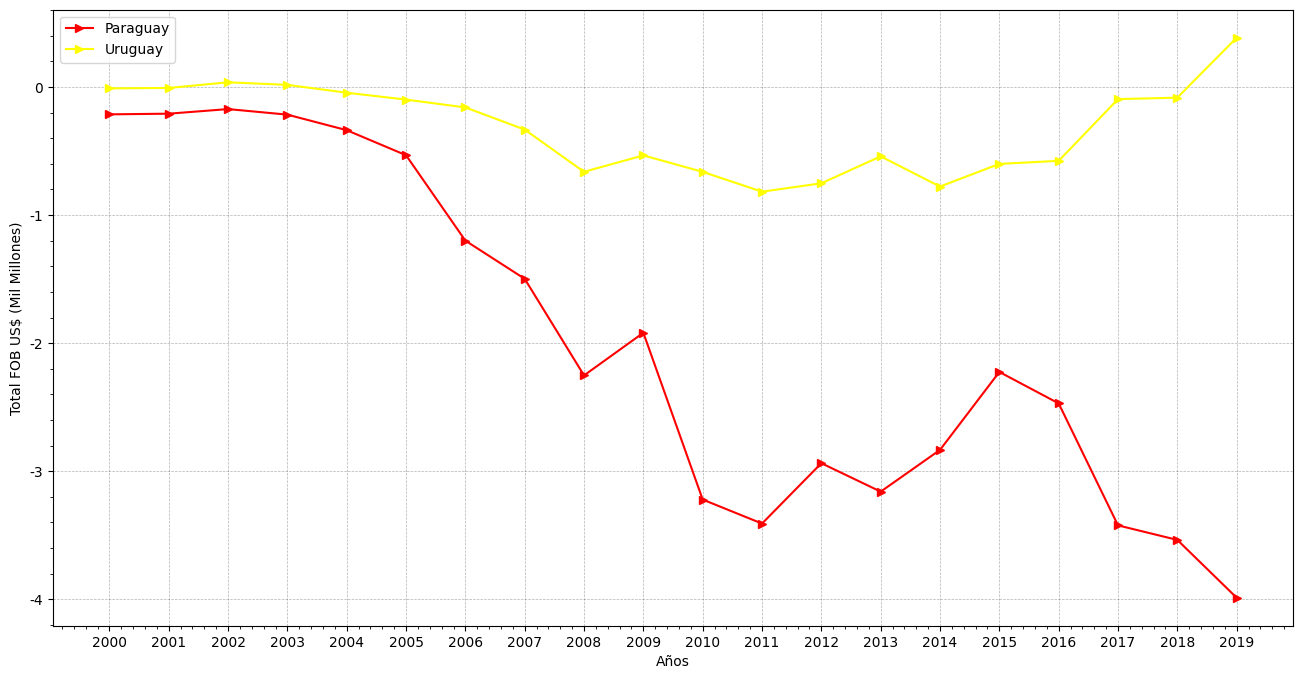

In [23]:
plt.figure(figsize=(16, 8))
# Definir una función para formatear los valores del eje x (en este caso, para eliminar los puntos flotantes)
def format_years(x, pos):
    return int(x)

def format_y_plain(x, pos):
    return f'{x/1000000000:.0f}' # Mostrar el número completo sin notación científica

# Crea el gráfico de barras
#plt.plot(df['Ano'], df['URY'], marker='*', label = "Uruguay",  linestyle='--')
#plt.plot(df['Ano'], df['BRA'], marker='+', label = "Brasil")

plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Paraguay_FOB'], marker='>', label = "Paraguay", color = "red")
plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Uruguay_FOB'], marker='>', label = "Uruguay", color = "yellow")

#activar leyenda
plt.legend()

#etiquetas en los ejes
plt.xlabel("Años") #etiqueta en eje x
plt.ylabel("Total FOB US$ (Mil Millones)")#etiqueta en eje y

# Configura el formateador personalizado para el eje x
formatter = FuncFormatter(format_years)
plt.gca().xaxis.set_major_formatter(formatter)

# Establece los límites del eje y para mostrar solo los primeros 3 números
# Configura el formateador personalizado para el eje y sin notación científica
y_formatter = FuncFormatter(format_y_plain)
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.xticks(np.arange(2000, 2020, 1))
#plt.yticks(np.arange(210000, 2020, 3))

#activar cuadricula 
#plt.grid()

#activar marcas menores 
plt.minorticks_on()
#plt.title("Mercosur4 - Evolución de las exportaciones del Arroz a China") #titulo
plt.grid(True, which='major', axis='both', color='black', linestyle='--', linewidth=0.5, alpha=0.3)
plt.savefig(r'C:\Users\Usuario\Desktop\Port Folio\Pandas y Matplotlib\Proyecto I+D UNO\Graf. 22\Balanzas2_Graf_linea.png', dpi=300, bbox_inches='tight')
plt.show()

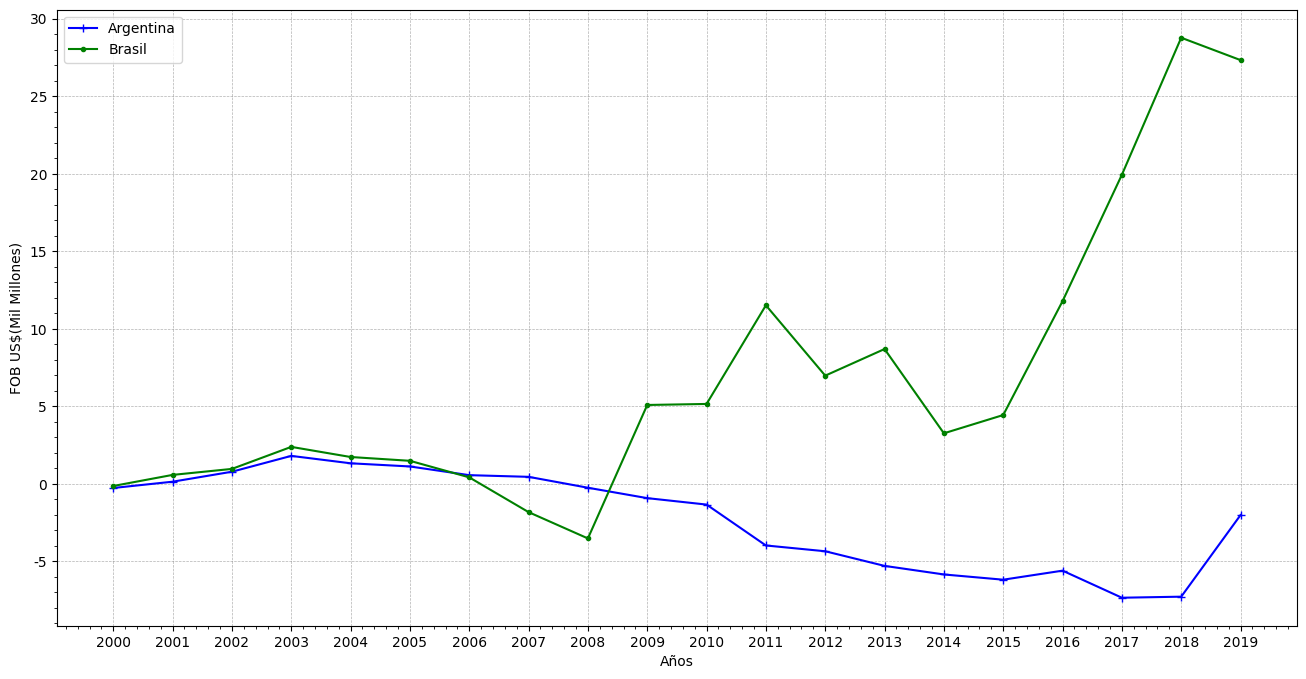

In [24]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter  # Importa FuncFormatter
plt.figure(figsize=(16, 8))
# Definir una función para formatear los valores del eje x (en este caso, para eliminar los puntos flotantes)
def format_years(x, pos):
    return int(x)

def format_y_plain(x, pos):
    return f'{x/1000000000:.0f}'  # Mostrar el número completo sin notación científica

# Crea el gráfico de barras
#plt.plot(df['Ano'], df['URY'], marker='*', label = "Uruguay",  linestyle='--')
#plt.plot(df['Ano'], df['BRA'], marker='+', label = "Brasil")

plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Balanza'], marker='+', label = "Argentina", color = "blue")
plt.plot(df_concatenado_c['AÑOS'], df_concatenado_c['Brasil_FOB'], marker='.', label = "Brasil", color = "green")

#activar leyenda
plt.legend()

#etiquetas en los ejes
plt.xlabel("Años") #etiqueta en eje x
plt.ylabel("FOB US$(Mil Millones)")#etiqueta en eje y

# Configura el formateador personalizado para el eje x
formatter = FuncFormatter(format_years)
plt.gca().xaxis.set_major_formatter(formatter)

# Establece los límites del eje y para mostrar solo los primeros 3 números
# Configura el formateador personalizado para el eje y sin notación científica
y_formatter = FuncFormatter(format_y_plain)
plt.gca().yaxis.set_major_formatter(y_formatter)


plt.xticks(np.arange(2000, 2020, 1))
#plt.yticks(np.arange(210000, 2020, 3))

#activar cuadricula 
#plt.grid()

#activar marcas menores 
plt.minorticks_on()
#plt.title("Mercosur4 - Evolución de las exportaciones del Arroz a China") #titulo
plt.grid(True, which='major', axis='both', color='black', linestyle='--', linewidth=0.5, alpha=0.3)
plt.savefig(r'C:\Users\Usuario\Desktop\Port Folio\Pandas y Matplotlib\Proyecto I+D UNO\Graf. 22\Linea_dos_2019.png', dpi=300, bbox_inches='tight')
plt.show()